# Classification Test

Here we're testing the possible models for data classification on this project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## 1. Water Required vs. Temperature data

Manually sampled values:

In [2]:
t    = np.array([15., 20., 25., 30., 35., 40.])
y_va = np.array([3.8, 5. , 6.2, 7.5, 9.5, 12.])
y_ac = np.array([3. , 3.8, 4.8, 5.8, 7. , 9.5])
y_la = np.array([2.3, 3. , 3.8, 4.8, 6.  ,8. ])
y_se = np.array([1.8, 2.2, 2.7, 3.3, 4.  ,5.5])

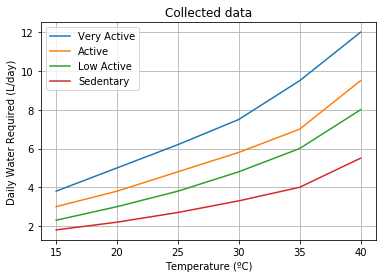

In [3]:
fig, ax = plt.subplots()

ax.plot(t, y_va, label='Very Active')
ax.plot(t, y_ac, label='Active')
ax.plot(t, y_la, label='Low Active')
ax.plot(t, y_se, label='Sedentary')

ax.legend()
ax.set(xlabel='Temperature (ºC)', ylabel='Daily Water Required (L/day)',
       title="Collected data")
ax.grid()

plt.show()

Polynomial fit:

In [4]:
DEGREE = 3
p_va = np.polynomial.polynomial.polyfit(t, y_va, DEGREE)
p_ac = np.polynomial.polynomial.polyfit(t, y_ac, DEGREE)
p_la = np.polynomial.polynomial.polyfit(t, y_la, DEGREE)
p_se = np.polynomial.polynomial.polyfit(t, y_se, DEGREE)

In [5]:
p_va

array([-2.21904762e+00,  6.20211640e-01, -1.93492063e-02,  3.18518519e-04])

In [6]:
p_ac

array([-4.41190476e+00,  8.49021164e-01, -3.06349206e-02,  4.51851852e-04])

In [7]:
p_la

array([-1.93809524e+00,  4.57248677e-01, -1.56031746e-02,  2.59259259e-04])

In [8]:
p_se

array([-2.01666667e+00,  4.47962963e-01, -1.68888889e-02,  2.59259259e-04])

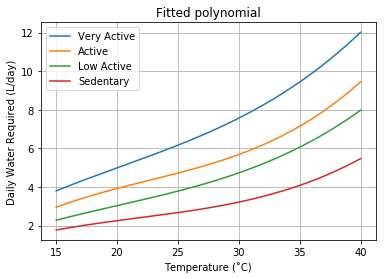

In [9]:
fig, ax = plt.subplots()

t_p = np.linspace(np.min(t), np.max(t), 200)

ax.plot(t_p, np.polynomial.polynomial.polyval(t_p, p_va), label='Very Active')
ax.plot(t_p, np.polynomial.polynomial.polyval(t_p, p_ac), label='Active')
ax.plot(t_p, np.polynomial.polynomial.polyval(t_p, p_la), label='Low Active')
ax.plot(t_p, np.polynomial.polynomial.polyval(t_p, p_se), label='Sedentary')

ax.legend()
ax.set(xlabel='Temperature (˚C)', ylabel='Daily Water Required (L/day)',
       title="Fitted polynomial")
ax.grid()

plt.show()

## 2. Water Needs vs. Age

In [10]:
a   = np.array([ .25, .75,  2.,  6., 11.,  16., 25.])
y_m = np.array([  .7,  .8, 1.3, 1.7, 2.4, 3.25, 3.6])
y_f = np.array([  .7,  .8, 1.3, 1.7, 2.1,  2.3, 2.6])

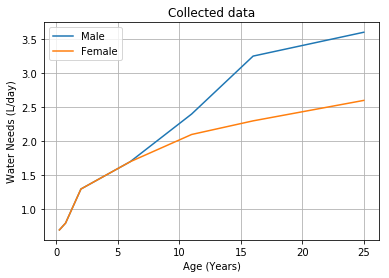

In [11]:
fig, ax = plt.subplots()

ax.plot(a, y_m, label='Male')
ax.plot(a, y_f, label='Female')

#ax.set_xscale('log')
#ax.set_yscale('log')

ax.legend()
ax.set(xlabel='Age (Years)', ylabel='Water Needs (L/day)',
       title="Collected data")
ax.grid()

plt.show()

The data looks like it might fit into a logarithm.

In [12]:
def log_func(x, a, b, c):
    return a * np.log(b * x) + c

popt_m, pcov_m = curve_fit(log_func, a, y_m)
popt_f, pcov_f = curve_fit(log_func, a, y_f)

/Users/duartegalvao/UNI/8/UC_Project/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/duartegalvao/UNI/8/UC_Project/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [13]:
popt_f

array([0.42601839, 1.18624985, 1.01016475])

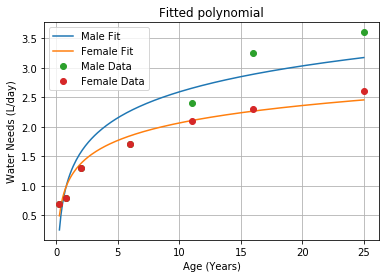

In [14]:
fig, ax = plt.subplots()

a_p = np.linspace(np.min(a), np.max(a), 200)

ax.plot(a_p, log_func(a_p, *popt_m), label='Male Fit')
ax.plot(a_p, log_func(a_p, *popt_f), label='Female Fit')

ax.plot(a, y_m, 'o', label='Male Data')
ax.plot(a, y_f, 'o', label='Female Data')

#ax.set_xscale('log')

ax.legend()
ax.set(xlabel='Age (Years)', ylabel='Water Needs (L/day)',
       title="Fitted polynomial")
ax.grid()

plt.show()

The female data fits pretty well into a logarithm. The male data, however, doesn't, so let's try a different approach for males.

In [15]:
sex_diff = y_m - y_f
sex_diff

array([0.  , 0.  , 0.  , 0.  , 0.3 , 0.95, 1.  ])

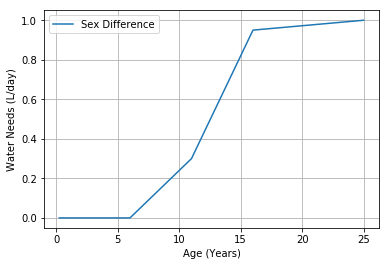

In [16]:
fig, ax = plt.subplots()

ax.plot(a, sex_diff, label='Sex Difference')

ax.legend()
ax.set(xlabel='Age (Years)', ylabel='Water Needs (L/day)')
ax.grid()

plt.show()

It looks like it could be a sigmoid curve...

In [17]:
FREQ = 0.2

def sigmoid_func(x, a, b, c, d):
    return ((a-b) / (1 + np.exp(x-(c/2))**d)) + b

popt_sd, pcov_sd = curve_fit(sigmoid_func, a, sex_diff)

In [18]:
popt_sd

array([-2.38162631e-03,  9.98905254e-01,  2.41898541e+01,  7.67665443e-01])

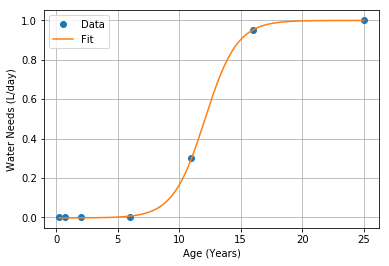

In [19]:
fig, ax = plt.subplots()

ax.plot(a, sex_diff, 'o', label='Data')

ax.plot(a_p, sigmoid_func(a_p, *popt_sd), label='Fit')

ax.legend()
ax.set(xlabel='Age (Years)', ylabel='Water Needs (L/day)')
ax.grid()

plt.show()

So, bringing these two toguether:

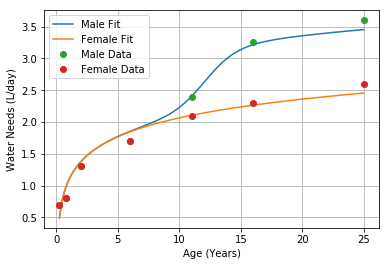

In [20]:
fig, ax = plt.subplots()

a_p = np.linspace(np.min(a), np.max(a), 200)

ax.plot(a_p, log_func(np.clip(a_p,0,35), *popt_f) + sigmoid_func(a_p, *popt_sd), label='Male Fit')
ax.plot(a_p, log_func(np.clip(a_p,0,35), *popt_f), label='Female Fit')

ax.plot(a, y_m, 'o', label='Male Data')
ax.plot(a, y_f, 'o', label='Female Data')

#ax.set_xscale('log')

ax.legend()
ax.set(xlabel='Age (Years)', ylabel='Water Needs (L/day)')
ax.grid()

plt.show()

## 3. Joining formulas

Now, we want to get a "master" formula that calculates the daily water needs, in liters, based on:

- Temperature (Celsius)
- Activity level (`'SE'`, `'LA'`, `'AC'` or `'VA'`)
- Age (Number; could be int or float)
- Sex (`'M'` or `'F'`)

In [21]:
def calculate_water_needs(temperature, activity_level, age, sex):
    # Auxilliary functions
    def fit_log(x):
        return 0.42601839 * np.log(1.18624985 * x) + 1.01016475
    def fit_sigmoid(x):
        return ((-1.0012868804199015) / (1 + np.exp(x-(12.094927039206933))**0.7676654429522934)) + 0.9989052541075444
    # Known constants
    TA_POLY = {
        'SE': [-2.01666667e+00,  4.47962963e-01, -1.68888889e-02,  2.59259259e-04],
        'LA': [-1.93809524e+00,  4.57248677e-01, -1.56031746e-02,  2.59259259e-04],
        'AC': [-4.41190476e+00,  8.49021164e-01, -3.06349206e-02,  4.51851852e-04],
        'VA': [-2.21904762e+00,  6.20211640e-01, -1.93492063e-02,  3.18518519e-04]
    }
    SEX_VAL = {
        'M': 1,
        'F': 0
    }
    AVG_CONSUMPTION = 3
    # Clip inputs avoid meaningless data outside normal values
    tmp_c = np.clip(temperature,15,40)
    age_c = np.clip(age,5,35)
    # We start with an average value
    wcons = AVG_CONSUMPTION
    # Now we add the temperature+activity level roughly normalized data
    wcons += np.polynomial.polynomial.polyval(tmp_c, TA_POLY[activity_level]) - AVG_CONSUMPTION
    # Then, the sex+age roughly normalized data
    wcons += fit_log(age_c) + SEX_VAL[sex]*fit_sigmoid(age) - AVG_CONSUMPTION
    
    return wcons

In [22]:
calculate_water_needs(40, 'VA', 40, 'M')

12.612349415964776